<a href="https://colab.research.google.com/github/Edgar-La/Machine_Learning/blob/main/k-NN/k-NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __k-NN__
__Author:__ Edgar Lara

__Date:__ Mar 19, 2021

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, make_moons

Create instances using makeblobs

In [4]:
#Making instances using -make_blobs()- method
def crear_puntos(n_MUESTRAS, k_CENTROS, std_dev, rnd_state):
	training_data , labels = make_blobs(n_samples=n_MUESTRAS, centers=k_CENTROS, cluster_std = std_dev, random_state= rnd_state)
	return training_data, labels

Create matrix with distances between the test-__Z__ and N-instances of __X__


In [120]:
def matrix_distances(X, Z):
  matrix = []
  for z in range(len(Z)):
    aux = []
    for n in range(len(X)):
      aux.append(np.linalg.norm(Z[z] - X[n]))
    matrix.append(aux)

  return matrix

Obtaning the _index_ of the k-minimal distances with every test-__Z__ value

In [54]:
def index_minimun_distances_matrix(k, matrix):
  matrix_min_index = []
  for n in range(len(matrix)):
    matrix_min_index.append(np.argpartition(matrix[n], k)[:k])  #https://stackoverflow.com/questions/16817948/i-have-need-the-n-minimum-index-values-in-a-numpy-array
  return matrix_min_index

Obtaining the correspond label of __X__ using the _index_

In [58]:
def clasifier_matrix(matrix_min_index, labels):
  matrix_labels = []
  for n in range(len(matrix_min_index)):
    aux = []
    for i in range(len(matrix_min_index[0])):
      aux.append(labels[matrix_min_index[n][i]])
    matrix_labels.append(aux)

  return matrix_labels

Obtaining the __mode__ of the label and creating the _predicted_labels_ array

In [75]:
def get_mode(matrix_labels):
  predicted_labels = []
  for n in range(len(matrix_labels)):
    predicted_labels.append(np.bincount(matrix_labels[n]).argmax()) #https://www.geeksforgeeks.org/find-the-most-frequent-value-in-a-numpy-array/
  return np.array(predicted_labels)

In [179]:
def plotter_function(X_, Z_ ,label_ ,label2_ ,color_map_, color_):
  plt.figure(figsize=(9, 9))

  plt.subplot(221)
  plt.scatter(X_[:,0], X_[:,1], c=label_, s=50, cmap=color_map_)
  plt.title('N-Instances')

  plt.subplot(222)
  plt.scatter(Z_[:,0], Z_[:,1], c=color_, s=100, alpha = .5)
  plt.title('test-Z')

  plt.subplot(223)
  plt.scatter(X_[:,0], X_[:,1], c=label_, s=50, cmap=color_map_)
  plt.scatter(Z_[:,0], Z_[:,1], c=color_, s=100, alpha = .5)
  plt.title('Without classifier')

  plt.subplot(224)
  plt.scatter(X_[:,0], X_[:,1], c=label_, s=50, cmap=color_map_)
  plt.scatter(Z_[:,0], Z_[:,1], c=label2_, s=50,  cmap=color_map_)
  plt.title('Using k-NN')

  plt.show()

# Calling functions

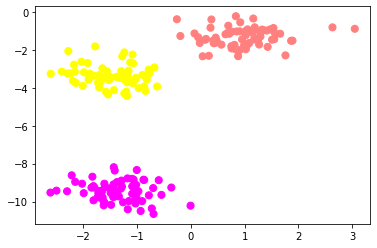

In [6]:
#Create N-instances
X, labels = crear_puntos(200, 3, 0.5, 2)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='spring')

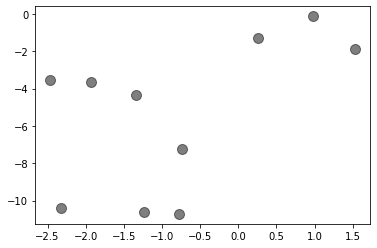

In [169]:
#Create test-Z values
Z, labels_2 = crear_puntos(10, 3, 0.99, 2)
plt.scatter(Z[:,0], Z[:,1], c='black', s=100, alpha = .5)
#print(Z)

In [185]:
#10x200 Matrix: Distance test-Z and N-instances of X
matrix = matrix_distances(X, Z)
print(pd.DataFrame(matrix))

        0         1         2    ...        197       198        199
0  3.290509  4.267665  3.862232  ...  10.502148  1.647907   0.893419
1  7.881240  7.000497  7.049555  ...   0.189645  9.587023   9.982626
2  2.724736  3.493534  2.877746  ...   8.943973  0.498010   0.957069
3  1.256897  0.409748  1.112173  ...   6.825655  4.339630   4.228922
4  4.515892  3.703115  3.661943  ...   3.228426  6.259632   6.602073
5  8.010681  7.159040  7.163185  ...   0.494034  9.570184   9.997607
6  1.943704  2.910725  2.507046  ...   9.236732  1.628013   1.140289
7  1.684967  0.799613  0.971880  ...   6.040884  4.290490   4.350755
8  1.625547  0.943330  1.643475  ...   6.982786  4.779101   4.608965
9  7.774975  6.835927  6.994877  ...   1.155804  9.805196  10.124659

[10 rows x 200 columns]


In [209]:
#https://stackoverflow.com/questions/16817948/i-have-need-the-n-minimum-index-values-in-a-numpy-array
k=5
matrix_min_index = index_minimun_distances_matrix(k, matrix)
matrix_min_index

[array([180, 162,  40,  11, 177]),
 array([197,  95,  61, 109, 174]),
 array([ 56,  93,  59, 101, 156]),
 array([186,  54, 143, 129,  76]),
 array([160, 166, 173, 137,  85]),
 array([132, 135,  61, 197, 109]),
 array([116,  67,  84, 192,  16]),
 array([100,  17,  70,  26, 178]),
 array([124, 185, 143,  34, 136]),
 array([174, 175, 184,  39,  36])]

In [172]:
matrix_labels = clasifier_matrix(matrix_min_index, labels)
matrix_labels

[[1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2],
 [0, 0, 0, 0, 0]]

In [173]:
predicted_labels = get_mode(matrix_labels)
print(predicted_labels)

[1 0 1 2 0 0 1 2 2 0]


# __Plotting the results__

Ploting the instances of the form _Blobs_

[1 0 1 2 0 0 1 2 2 0]
[1 0 1 2 0 0 1 2 2 0]


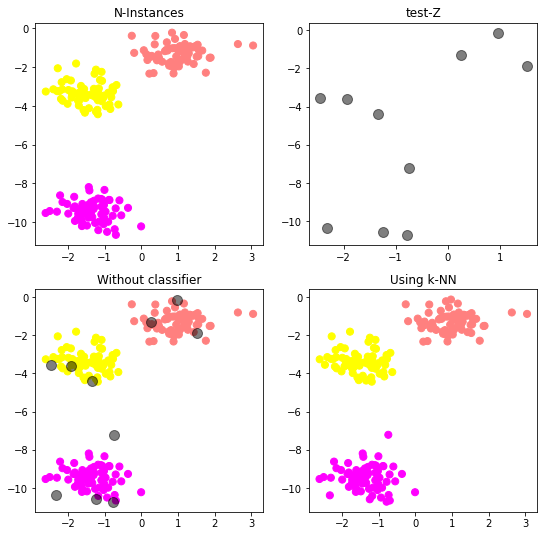

In [180]:
print(labels_2)
print(predicted_labels)

plotter_function(X, Z, labels, labels_2, 'spring', 'black')

Testing the algorithm using instances of the form _Moons_

[0 0 0 0 1 0 1 1 1 1]
[1 0 0 0 0 0 1 1 0 1]


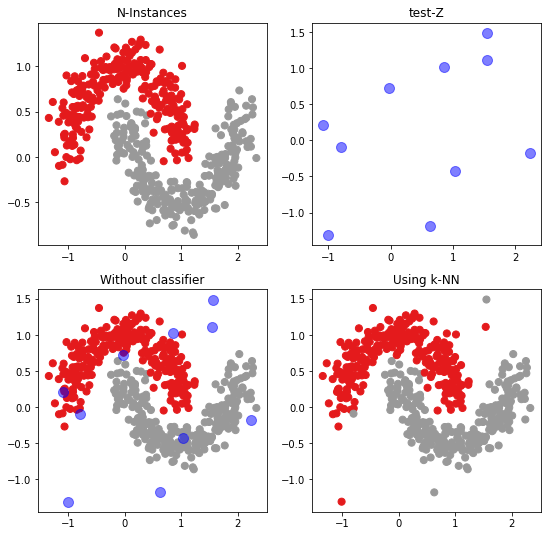

In [207]:
X_moon, labels_moon = make_moons(n_samples=500, noise=.15, random_state=42) #Hands-On Machine Learning - Aurelien Geron (Book)
Z_moon, labels_moon_2 = make_moons(n_samples=10, noise=.70, random_state=30)
matrix_moon = matrix_distances(X_moon, Z_moon)
k=5
matrix_min_index_moon = index_minimun_distances_matrix(k, matrix_moon)
matrix_labels_moon = clasifier_matrix(matrix_min_index_moon, labels_moon)
predicted_labels_moon = get_mode(matrix_labels_moon)

print(labels_moon_2)
print(predicted_labels_moon)



plotter_function(X_moon, Z_moon, labels_moon ,labels_moon_2, 'Set1', 'blue')

[1 3 2 4 0]
[5 3 2 4 0]


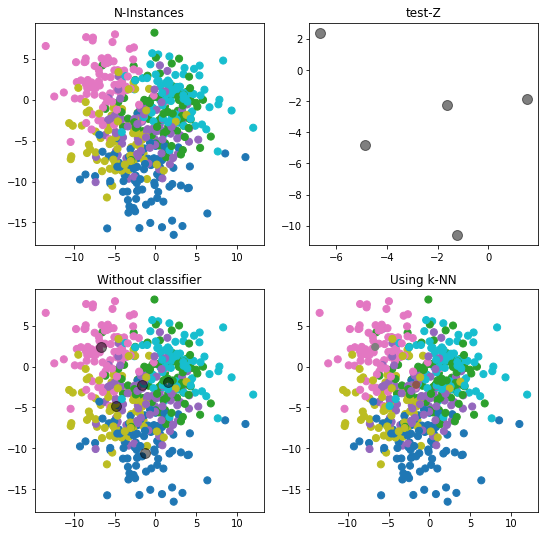

In [206]:
X_t, labelst = crear_puntos(500, 6, 3, 2)
Z_t, labelst_2 = crear_puntos(5, 6, 0.99, 2)
matrix_t = matrix_distances(X_t, Z_t)
k=10
matrix_min_index_t = index_minimun_distances_matrix(k, matrix_t)
matrix_labels_t = clasifier_matrix(matrix_min_index_t, labelst)
predicted_labels_t = get_mode(matrix_labels_t)

print(labelst_2)
print(predicted_labels_t)



plotter_function(X_t, Z_t, labelst ,labelst_2, 'tab10', 'black')